In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Load the dataset from the CSV file
try:
    df = pd.read_csv('student_feedback.csv')
except FileNotFoundError:
    print("Error: 'student_feedback.csv' not found. Please upload the file.")
    # Create a dummy dataframe to allow the script to run for demonstration
    data = {'Student ID': [1,2], 'Well versed with the subject': [8,5], 'Explains concepts in an understandable way': [7,4]}
    df = pd.DataFrame(data)


# Drop the 'Unnamed: 0' column if it exists, as it's not needed
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Identify all columns that should contain ratings (all except the first one)
rating_columns = df.columns[1:]

# Convert all rating columns to a numeric format.
# errors='coerce' will turn any non-numeric text into an empty value, preventing errors.
for col in rating_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("--- Data Loaded and Cleaned Successfully ---")


--- Data Loaded and Cleaned Successfully ---



--- Average Scores by Category (out of 10) ---
Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


/tmp/ipython-input-3285913299.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_scores.values, y=average_scores.index, orient='h', palette='viridis')



Chart saved as 'average_scores_chart.png'


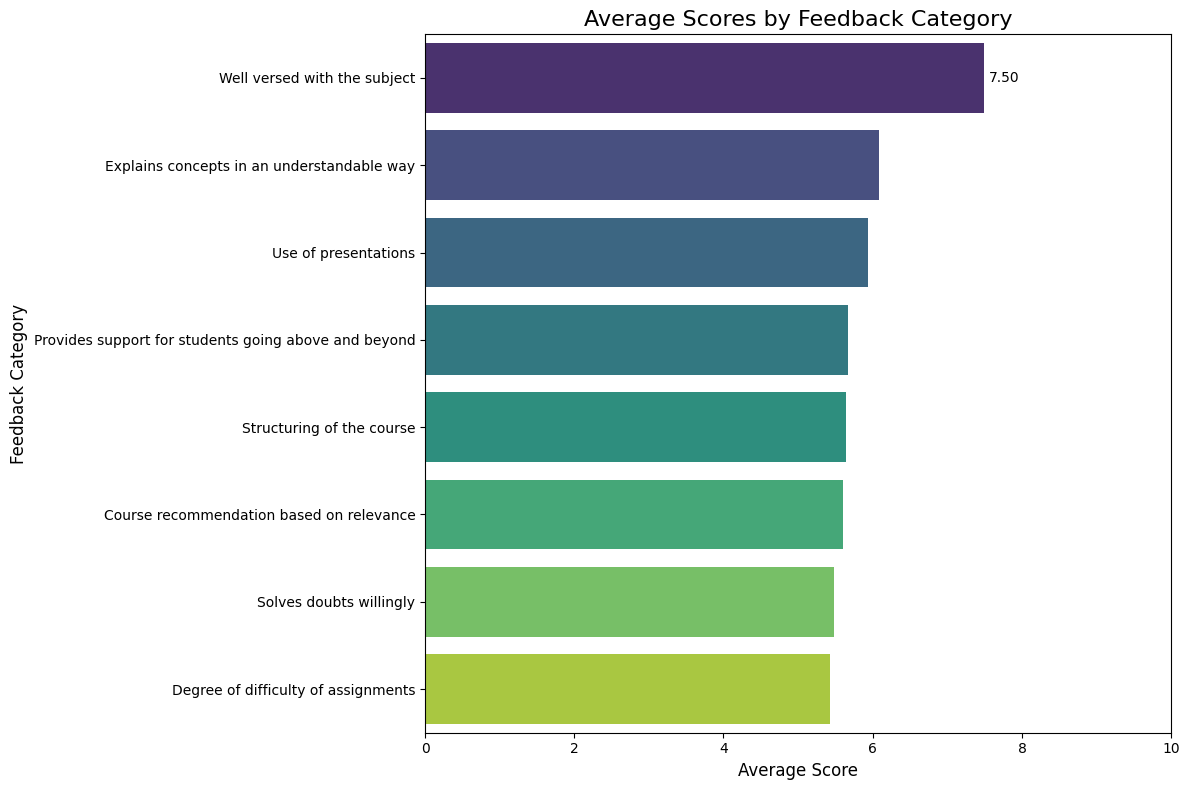

In [27]:
# Calculate the average score for each category and sort from highest to lowest
average_scores = df[rating_columns].mean().sort_values(ascending=False)

print("\n--- Average Scores by Category (out of 10) ---")
print(average_scores)

# --- Create the Visualization ---
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=average_scores.values, y=average_scores.index, orient='h', palette='viridis')

# Add titles and labels to make the chart easy to understand
ax.set_title('Average Scores by Feedback Category', fontsize=16)
ax.set_xlabel('Average Score', fontsize=12)
ax.set_ylabel('Feedback Category', fontsize=12)

# Add the exact score value to the end of each bar
ax.bar_label(ax.containers[0], fmt='%.2f', padding=3)

# Set the score limit from 0 to 10
plt.xlim(0, 10)
plt.tight_layout()

# Save the chart as an image file
plt.savefig('average_scores_chart.png')
print("\nChart saved as 'average_scores_chart.png'")

# Display the chart
plt.show()

In [28]:
!pip install textblob
!pip install wordcloud

In [31]:
from textblob import TextBlob
from wordcloud import WordCloud

# Create a sample DataFrame with text comments
data = {
    'Comments': [
        "The workshop was excellent and very practical!",
        "Great session, I learned a lot from the speaker.",
        "The event was boring and not well-organized.",
        "It was okay, but the session was a bit too long.",
        "A total waste of time, the audio was terrible.",
        "Loved the energy and the great performances!"
    ]
}
df_nlp = pd.DataFrame(data)

# --- Define NLP Functions ---
def get_sentiment_score(text):
    # Returns a score from -1 (negative) to +1 (positive)
    return TextBlob(text).sentiment.polarity

def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the functions to create new analysis columns
df_nlp['SentimentScore'] = df_nlp['Comments'].apply(get_sentiment_score)
df_nlp['SentimentCategory'] = df_nlp['SentimentScore'].apply(categorize_sentiment)

print("\n--- NLP Analysis Results ---")
print(df_nlp)



--- NLP Analysis Results ---
                                           Comments  SentimentScore  \
0    The workshop was excellent and very practical!           0.625   
1  Great session, I learned a lot from the speaker.           0.800   
2      The event was boring and not well-organized.          -1.000   
3  It was okay, but the session was a bit too long.           0.225   
4    A total waste of time, the audio was terrible.          -0.400   
5      Loved the energy and the great performances!           0.850   

  SentimentCategory  
0          Positive  
1          Positive  
2          Negative  
3          Positive  
4          Negative  
5          Positive  



Pie chart saved as 'sentiment_pie_chart.png'


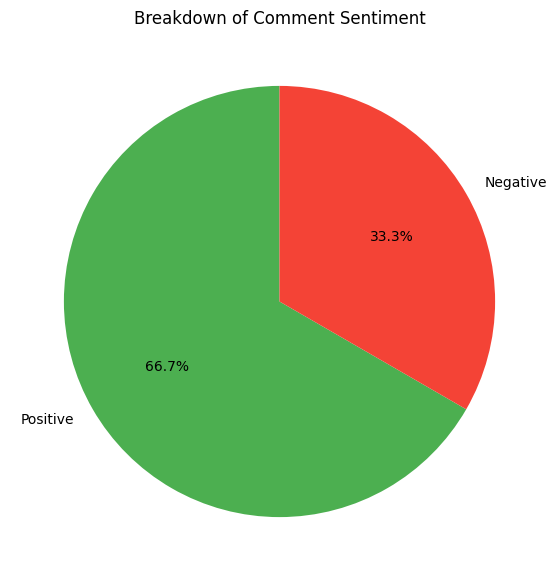

In [33]:
# --- Visualization 1: Pie Chart for Sentiment Breakdown ---
sentiment_counts = df_nlp['SentimentCategory'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336', '#9E9E9E'])
plt.title('Breakdown of Comment Sentiment')
plt.savefig('sentiment_pie_chart.png')
print("\nPie chart saved as 'sentiment_pie_chart.png'")
plt.show()


# --- Visualization 2: Word Cloud for Common Words ---
# Combine all comments into a single block of text
all_comments = ' '.join(df_nlp['Comments'])

In [36]:
!pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


3D Bar Chart saved as '3d_bar_chart.png'


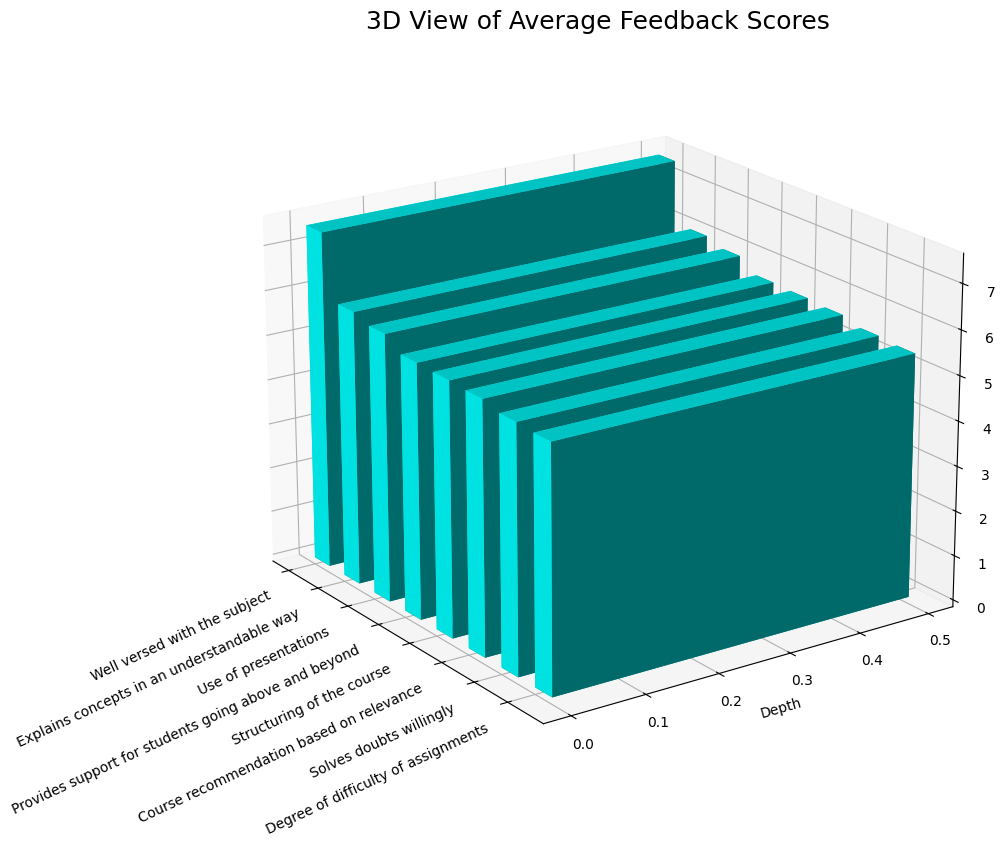

In [37]:
# --- 3. Create the 3D Visualization ---
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Set positions for the bars
x_pos = np.arange(len(average_scores)) # X positions
y_pos = np.zeros(len(average_scores))  # Y positions (all at 0)
z_pos = np.zeros(len(average_scores))  # Z positions (bars start from the bottom)

# Set dimensions of the bars
dx = 0.5 * np.ones(len(average_scores)) # Width of bars
dy = 0.5 * np.ones(len(average_scores)) # Depth of bars
dz = average_scores.values              # Height of bars is the average score

# Create the 3D bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='cyan')

# --- 4. Customize the Chart ---
ax.set_title('3D View of Average Feedback Scores', fontsize=18)
ax.set_ylabel('Depth') # This axis doesn't represent a variable, it's for visual depth
ax.set_zlabel('Average Score (out of 10)', fontsize=12)

# Set the category names as labels for the x-axis
ax.set_xticks(x_pos)
ax.set_xticklabels(average_scores.index, rotation=25, ha='right', fontsize=10)

# Adjust the viewing angle
ax.view_init(elev=20, azim=-35)

plt.savefig('3d_bar_chart.png')
print("\n3D Bar Chart saved as '3d_bar_chart.png'")
plt.show()

In [42]:
import plotly.express as px
# Take a sample of the first 20 students for a cleaner chart
df_sample = df.head(20)

# --- 2. Restructure the Data for Plotting ---
# We 'melt' the data to turn it from a wide table to a long one, which is ideal for Plotly
df_melted = df_sample.melt(id_vars=['Student ID'], var_name='Feedback Category', value_name='Score')

# --- 3. Create the Interactive Line Chart ---
fig = px.line(
    df_melted,
    x='Student ID',
    y='Score',
    color='Feedback Category', # Each category gets its own colored line
    markers=True, # Add markers for each data point
    title='Feedback Scores Across Individual Students (Sample of 20)'
)

# Customize the chart for better readability
fig.update_layout(
    xaxis_title='Student ID',
    yaxis_title='Score (out of 10)',
    legend_title='Feedback Category'
)

# Show the interactive plot
fig.show()

In [43]:
# --- 2. Restructure Data for Box Plot ---
df_melted_box = df[rating_columns].melt(var_name='Feedback Category', value_name='Score')

# --- 3. Create the Interactive Box Plot ---
fig_box = px.box(
    df_melted_box,
    x='Feedback Category',
    y='Score',
    color='Feedback Category',
    title='Distribution of Scores for Each Feedback Category'
)

fig_box.update_layout(
    xaxis_title='Feedback Category',
    yaxis_title='Score (out of 10)',
    showlegend=False # Hide legend as colors are self-explanatory
)

fig_box.show()

In [44]:

rating_columns = df.columns[1:]
for col in rating_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- 2. Calculate the Correlation Matrix ---
correlation_matrix = df[rating_columns].corr()

# --- 3. Create the Interactive Heatmap ---
fig_heatmap = px.imshow(
    correlation_matrix,
    text_auto=True, # Automatically write the correlation values on the map
    aspect="auto",
    color_continuous_scale='RdBu_r', # Use a red-blue color scale
    title='Correlation Heatmap of Feedback Categories'
)

fig_heatmap.show()